**Ecuación Cuadrática**

In [ ]:
import math
a=1.0
b=1.0
xp=list(range(1,11))
x1l=[]
x2l=[]

for n in range(1,10+1):
  c=math.pow(10,-n)
  disc = math.sqrt(math.pow(b,2)-4*a*c)
  
  x1 = (-b+disc)/(2*a)
  x1p = (-2*c)/(b+disc)
  x1l.append(abs((x1-x1p)/x1))
  
  x2 = (-b-disc)/(2*a)
  x2p = (-2*c)/(b-disc)
  x2l.append(abs((x2-x2p)/x2))

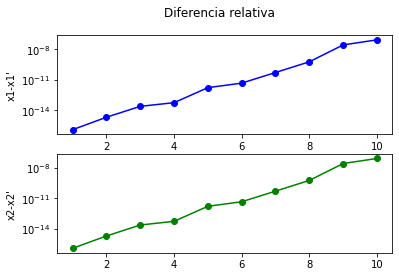

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

fig.suptitle('Diferencia relativa')
axs[0].set(ylabel='x1-x1\'')
axs[1].set(ylabel='x2-x2\'')

axs[0].semilogy(xp, x1l,'-o', color = "b")
axs[1].semilogy(xp, x2l,'-o', color = "g")

En base a los resultados, la precisión disminuye a medida que el numero c se vuelve más pequeño, debido a que aumenta el error de cancelación de la sustracción.



**Arreglando una expresión matemática**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

#nMin:1000000 nMax: 10000000
n = 10000000
x = np.linspace(0,math.pi,n)

#Función
def fn(x):
    return np.ones(len(x)) - np.sin(x)

#Funciónes modificadas algebraicamente
def fnm1(x):
    return 1-2*np.sin(x/2)*np.cos(x/2)

def fnm2(x):
    return np.cos(x)**2 + (np.sin(x)-1/2)**2 - 1/4

def fnm3(x):
    return np.cos(x)**2/(1 + np.sin(x))

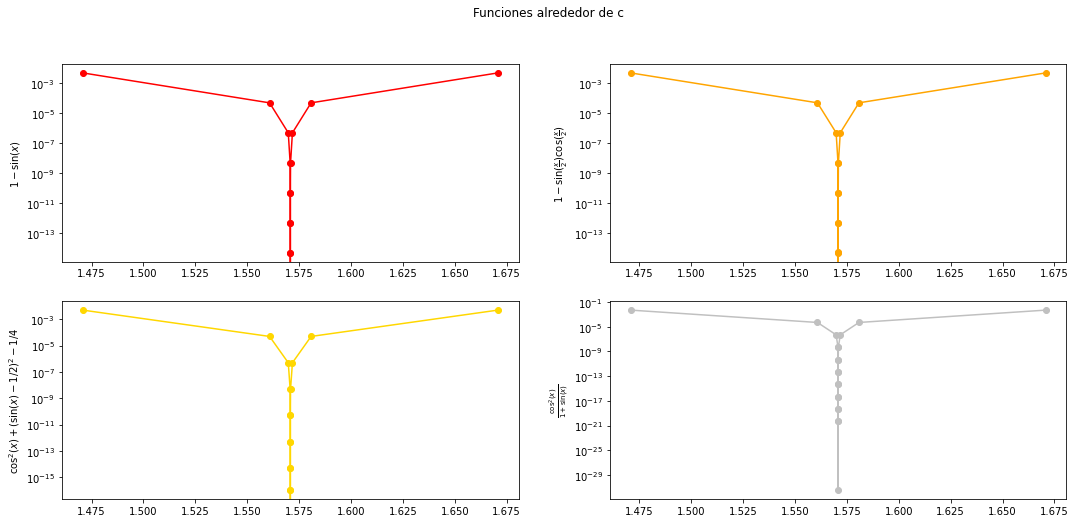

In [ ]:
#Función evaluada para encoontrar c
y = fn(x)

#Precisión del valor a comparar
a = 1*pow(10,-10)
cl = x[y<a]

#c
c = cl.mean()

#Lista de valores c mediante lista comprimidad con doble condicional
xcl = list(reversed([c - math.pow(10,-20+(n-1))  if n>10 else 
                   c + math.pow(10,-(n+1)) if n<10 else 
                   c for n in range(0,21)]))

#Conversión de lista a Array
xc = np.array(xcl)

#Función evaluada alrededor de c
yc = fn(xc)

#Función modificadas evaluadas alrededor de c
ymc1 = fnm1(xc)
ymc2 = fnm2(xc)
ymc3 = fnm3(xc)

#plots

fig, axs = plt.subplots(2,2,figsize=(18, 8))

fig.suptitle('Funciones alrededor de c')

axs[0,0].set_ylabel(r'$1-\sin(x)$')
axs[0,1].set_ylabel(r'$1-\sin(\frac{x}{2})\cos(\frac{x}{2})$')
axs[1,0].set_ylabel(r'$\cos^2(x)+(\sin(x)-1/2)^2-1/4$')
axs[1,1].set_ylabel(r'$\frac{\cos^2(x)}{1 + \sin(x)}$')


axs[0,0].semilogy(xc, yc, '-o',color = "red")
axs[0,1].semilogy(xc, ymc1, '-o',color = "orange")
axs[1,0].semilogy(xc, ymc2, '-o',color = "gold")
axs[1,1].semilogy(xc, ymc3, '-o',color = "silver")

En las gráficas vemos como en las funciónes modificadas los efectos del error de cancelación de la sustracción disminuyen a medida que la reformulación algebraica, tenga menos operaciones de sustración.